In [32]:
import numpy as np
import pandas as pd

import seaborn as sns

import statsmodels.api as sm

# Ontario's Social Distancing Score

In [39]:
# import data
mobility_ontario = pd.read_csv('../../data/cleaned_data/modeling_data.csv')

# drop column
mobility_ontario = mobility_ontario.drop('Unnamed: 0', axis=1)

# define features and target
features = ['Confirmed Cases (Ontario)', 'New Cases (Ontario)', 'New Cases (World)', 'Cumulative Cases (World)', \
            'New Deaths (World)', 'Cumulative Deaths (World)', 'Mean Temperature', 'Total Precipitation', \
            'Days Since First Case']
target = 'Social Distancing Score'

In [24]:
mobility_ontario.columns

Index(['Unnamed: 0', 'Date', 'Social Distancing Score',
       'Confirmed Cases (Ontario)', 'New Cases (Ontario)', 'New Cases (World)',
       'Cumulative Cases (World)', 'New Deaths (World)',
       'Cumulative Deaths (World)', 'Mean Temperature', 'Total Precipitation',
       'Days Since First Case'],
      dtype='object')

## Multiple Linear Regression

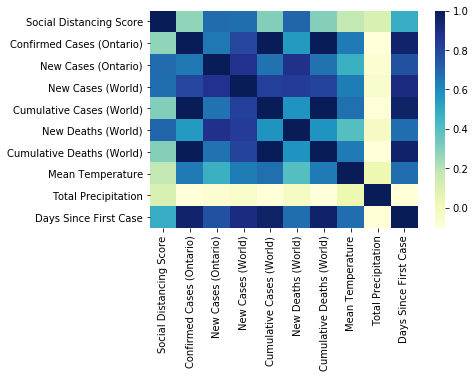

In [44]:
# Multicollinearity assumption

# Drop column
corr_data = mobility_ontario.drop('Date', axis=1)

# Correlation matrix
corr = corr_data.corr()

# heatmap to visualize correlation
sns.heatmap(corr, cmap="YlGnBu")

### MLR with all features

In [45]:
X_mlr = mobility_ontario[features]
y_mlr = mobility_ontario[target]

mlr = sm.OLS(y_mlr, X_mlr).fit()
predictions = mlr.predict(X_mlr)

mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Social Distancing Score   R-squared (uncentered):                   0.967
Model:                                 OLS   Adj. R-squared (uncentered):              0.964
Method:                      Least Squares   F-statistic:                              265.7
Date:                     Sat, 06 Jun 2020   Prob (F-statistic):                    2.92e-56
Time:                             16:49:10   Log-Likelihood:                         -334.98
No. Observations:                       90   AIC:                                      688.0
Df Residuals:                           81   BIC:                                      710.5
Df Model:                                9                                                  
Covariance Type:                 nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Confirmed Cases (Ontario)    -0.0168      0.008     -2.235      0.028      -0.032      -0.002
New Cases (Ontario)           0.0145      0.014      1.030      0.306      -0.014       0.043
New Cases (World)             0.0005      0.000      4.225      0.000       0.000       0.001
Cumulative Cases (World)  -1.852e-05   1.36e-05     -1.360      0.178   -4.56e-05    8.58e-06
New Deaths (World)           -0.0007      0.001     -0.680      0.498      -0.003       0.001
Cumulative Deaths (World)     0.0014      0.001      2.416      0.018       0.000       0.003
Mean Temperature             -0.8060      0.327     -2.461      0.016      -1.458      -0.154
Total Precipitation           0.8290      0.377      2.196      0.031       0.078       1.580
Days Since First Case         0.4748      0.087      5.442      0.000       0.301       0.648
==============================================================================
Omnibus:                        0.704   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.703   Jarque-Bera (JB):                0.369
Skew:                           0.143   Prob(JB):                        0.831
Kurtosis:                       3.131   Cond. No.                     8.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### MLR with selected features

In [46]:
features = ['Confirmed Cases (Ontario)', 'New Cases (Ontario)', 'New Cases (World)', 'Cumulative Cases (World)', \
            'Mean Temperature', 'Total Precipitation', \
            'Days Since First Case']

X_mlr = mobility_ontario[features]
y_mlr = mobility_ontario[target]

mlr = sm.OLS(y_mlr, X_mlr).fit()
predictions = mlr.predict(X_mlr)

mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Social Distancing Score   R-squared (uncentered):                   0.965
Model:                                 OLS   Adj. R-squared (uncentered):              0.962
Method:                      Least Squares   F-statistic:                              325.5
Date:                     Sat, 06 Jun 2020   Prob (F-statistic):                    1.54e-57
Time:                             16:49:10   Log-Likelihood:                         -338.14
No. Observations:                       90   AIC:                                      690.3
Df Residuals:                           83   BIC:                                      707.8
Df Model:                                7                                                  
Covariance Type:                 nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Confirmed Cases (Ontario)     0.0006      0.002      0.249      0.804      -0.004       0.005
New Cases (Ontario)           0.0165      0.013      1.312      0.193      -0.008       0.041
New Cases (World)             0.0006      0.000      5.249      0.000       0.000       0.001
Cumulative Cases (World)  -1.774e-05   1.36e-05     -1.300      0.197   -4.49e-05     9.4e-06
Mean Temperature             -1.0806      0.314     -3.436      0.001      -1.706      -0.455
Total Precipitation           0.9292      0.383      2.424      0.018       0.167       1.692
Days Since First Case         0.6119      0.068      8.991      0.000       0.477       0.747
==============================================================================
Omnibus:                        0.331   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.167
Skew:                           0.105   Prob(JB):                        0.920
Kurtosis:                       3.020   Cond. No.                     8.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusion

Multiple linear regression might not be a good model to model relationship between Ontario's social distancing score and the features we have. It violates the "no multicollinearity" assumption between the independent variables. As shown in the heatmap for the variables above, certain independent variables are highly correlated with each other.

## Random forests